In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import fuzzywuzzy as fz
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")

In [2]:
df = pd.read_csv('candyhierarchy2017.csv')

In [3]:
# Show the first 5 rows of the data frame
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don�t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey�s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M�s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese�s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
q12: media [daily dish],85.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
q12: media [science],1362.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
q12: media [espn],99.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
q12: media [yahoo],67.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [4]:
# drop unknown columns
to_drop = ('Unnamed: 113','Click Coordinates (x, y)')

In [5]:
# setting the index to Internal ID as the unique identifier
df = df.set_index('Internal ID')
df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don�t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey�s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M�s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese�s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAI

In [6]:
# getting rid of caps in column names
df.columns= df.columns.str.lower()

In [7]:
df

,q1: going out?,q2: gender,q3: age,q4: country,"q5: state, province, county, etc",q6 | 100 grand bar,q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),q6 | any full-sized candy bar,q6 | black jacks,q6 | bonkers (the candy),q6 | bonkers (the board game),q6 | bottle caps,q6 | box'o'raisins,q6 | broken glow stick,q6 | butterfinger,q6 | cadbury creme eggs,q6 | candy corn,q6 | candy that is clearly just the stuff given out for free at restaurants,q6 | caramellos,"q6 | cash, or other forms of legal tender",q6 | chardonnay,q6 | chick-o-sticks (we don�t know what that is),q6 | chiclets,q6 | coffee crisp,q6 | creepy religious comics/chick tracts,q6 | dental paraphenalia,q6 | dots,q6 | dove bars,q6 | fuzzy peaches,q6 | generic brand acetaminophen,q6 | glow sticks,q6 | goo goo clusters,q6 | good n' plenty,q6 | gum from baseball cards,q6 | gummy bears straight up,q6 | hard candy,q6 | healthy fruit,q6 | heath bar,q6 | hershey's dark chocolate,q6 | hershey�s milk chocolate,q6 | hershey's kisses,q6 | hugs (actual physical hugs),q6 | jolly rancher (bad flavor),q6 | jolly ranchers (good flavor),q6 | joyjoy (mit iodine!),q6 | junior mints,q6 | senior mints,q6 | kale smoothie,q6 | kinder happy hippo,q6 | kit kat,q6 | laffytaffy,q6 | lemonheads,q6 | licorice (not black),q6 | licorice (yes black),q6 | lindt truffle,q6 | lollipops,q6 | mars,q6 | maynards,q6 | mike and ike,q6 | milk duds,q6 | milky way,q6 | regular m&ms,q6 | peanut m&m�s,q6 | blue m&m's,q6 | red m&m's,q6 | green party m&m's,q6 | independent m&m's,q6 | abstained from m&m'ing.,q6 | minibags of chips,q6 | mint kisses,q6 | mint juleps,q6 | mr. goodbar,q6 | necco wafers,q6 | nerds,q6 | nestle crunch,q6 | now'n'laters,q6 | peeps,q6 | pencils,q6 | pixy stix,q6 | real housewives of orange county season 9 blue-ray,q6 | reese�s peanut butter cups,q6 | reese's pieces,q6 | reggie jackson bar,q6 | rolos,q6 | sandwich-sized bags filled with booberry crunch,q6 | skittles,q6 | smarties (american),q6 | smarties (commonwealth),q6 | snickers,q6 | sourpatch kids (i.e. abominations of nature),q6 | spotted dick,q6 | starburst,q6 | sweet tarts,q6 | swedish fish,q6 | sweetums (a friend to diabetes),q6 | take 5,q6 | tic tacs,q6 | those odd marshmallow circus peanut things,q6 | three musketeers,q6 | tolberone something or other,q6 | trail mix,q6 | twix,"q6 | vials of pure high fructose corn syrup, for main-lining into your vein",q6 | vicodin,q6 | whatchamacallit bars,q6 | white bread,q6 | whole wheat anything,q6 | york peppermint patties,q7: joy other,q8: despair other,q9: other comments,q10: dress,unnamed: 113,q11: day,q12: media [daily dish],q12: media [science],q12: media [espn],q12: media [yahoo],"click coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAI

In [19]:
# rename columns
df.rename(columns={"q1: going out?": "going out?",'q5: state, province, county, etc':'state province county'}, inplace=True)

In [32]:
df.head(60)

,going out?,q2: gender,q3: age,q4: country,state province county,q6 | 100 grand bar,q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),q6 | any full-sized candy bar,q6 | black jacks,q6 | bonkers (the candy),q6 | bonkers (the board game),q6 | bottle caps,q6 | box'o'raisins,q6 | broken glow stick,q6 | butterfinger,q6 | cadbury creme eggs,q6 | candy corn,q6 | candy that is clearly just the stuff given out for free at restaurants,q6 | caramellos,"q6 | cash, or other forms of legal tender",q6 | chardonnay,q6 | chick-o-sticks (we don�t know what that is),q6 | chiclets,q6 | coffee crisp,q6 | creepy religious comics/chick tracts,q6 | dental paraphenalia,q6 | dots,q6 | dove bars,q6 | fuzzy peaches,q6 | generic brand acetaminophen,q6 | glow sticks,q6 | goo goo clusters,q6 | good n' plenty,q6 | gum from baseball cards,q6 | gummy bears straight up,q6 | hard candy,q6 | healthy fruit,q6 | heath bar,q6 | hershey's dark chocolate,q6 | hershey�s milk chocolate,q6 | hershey's kisses,q6 | hugs (actual physical hugs),q6 | jolly rancher (bad flavor),q6 | jolly ranchers (good flavor),q6 | joyjoy (mit iodine!),q6 | junior mints,q6 | senior mints,q6 | kale smoothie,q6 | kinder happy hippo,q6 | kit kat,q6 | laffytaffy,q6 | lemonheads,q6 | licorice (not black),q6 | licorice (yes black),q6 | lindt truffle,q6 | lollipops,q6 | mars,q6 | maynards,q6 | mike and ike,q6 | milk duds,q6 | milky way,q6 | regular m&ms,q6 | peanut m&m�s,q6 | blue m&m's,q6 | red m&m's,q6 | green party m&m's,q6 | independent m&m's,q6 | abstained from m&m'ing.,q6 | minibags of chips,q6 | mint kisses,q6 | mint juleps,q6 | mr. goodbar,q6 | necco wafers,q6 | nerds,q6 | nestle crunch,q6 | now'n'laters,q6 | peeps,q6 | pencils,q6 | pixy stix,q6 | real housewives of orange county season 9 blue-ray,q6 | reese�s peanut butter cups,q6 | reese's pieces,q6 | reggie jackson bar,q6 | rolos,q6 | sandwich-sized bags filled with booberry crunch,q6 | skittles,q6 | smarties (american),q6 | smarties (commonwealth),q6 | snickers,q6 | sourpatch kids (i.e. abominations of nature),q6 | spotted dick,q6 | starburst,q6 | sweet tarts,q6 | swedish fish,q6 | sweetums (a friend to diabetes),q6 | take 5,q6 | tic tacs,q6 | those odd marshmallow circus peanut things,q6 | three musketeers,q6 | tolberone something or other,q6 | trail mix,q6 | twix,"q6 | vials of pure high fructose corn syrup, for main-lining into your vein",q6 | vicodin,q6 | whatchamacallit bars,q6 | white bread,q6 | whole wheat anything,q6 | york peppermint patties,q7: joy other,q8: despair other,q9: other comments,q10: dress,unnamed: 113,q11: day,q12: media [daily dish],q12: media [science],q12: media [espn],q12: media [yahoo],"click coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR

In [35]:
df['state province county'].str.split(',', expand=True).head(40)

,0,1,2
Internal ID,,,
90258773,NaN,NaN,NaN
90272821,NM,None,None
90272829,Virginia,None,None
90272840,or,None,None
90272841,exton pa,None,None
90272852,NaN,NaN,NaN
90272853,Colorado,None,None
90272854,ontario,None,None
90272858,Ontario,None,None


In [34]:
df

,going out?,q2: gender,q3: age,q4: country,state province county,q6 | 100 grand bar,q6 | anonymous brown globs that come in black and orange wrappers\t(a.k.a. mary janes),q6 | any full-sized candy bar,q6 | black jacks,q6 | bonkers (the candy),q6 | bonkers (the board game),q6 | bottle caps,q6 | box'o'raisins,q6 | broken glow stick,q6 | butterfinger,q6 | cadbury creme eggs,q6 | candy corn,q6 | candy that is clearly just the stuff given out for free at restaurants,q6 | caramellos,"q6 | cash, or other forms of legal tender",q6 | chardonnay,q6 | chick-o-sticks (we don�t know what that is),q6 | chiclets,q6 | coffee crisp,q6 | creepy religious comics/chick tracts,q6 | dental paraphenalia,q6 | dots,q6 | dove bars,q6 | fuzzy peaches,q6 | generic brand acetaminophen,q6 | glow sticks,q6 | goo goo clusters,q6 | good n' plenty,q6 | gum from baseball cards,q6 | gummy bears straight up,q6 | hard candy,q6 | healthy fruit,q6 | heath bar,q6 | hershey's dark chocolate,q6 | hershey�s milk chocolate,q6 | hershey's kisses,q6 | hugs (actual physical hugs),q6 | jolly rancher (bad flavor),q6 | jolly ranchers (good flavor),q6 | joyjoy (mit iodine!),q6 | junior mints,q6 | senior mints,q6 | kale smoothie,q6 | kinder happy hippo,q6 | kit kat,q6 | laffytaffy,q6 | lemonheads,q6 | licorice (not black),q6 | licorice (yes black),q6 | lindt truffle,q6 | lollipops,q6 | mars,q6 | maynards,q6 | mike and ike,q6 | milk duds,q6 | milky way,q6 | regular m&ms,q6 | peanut m&m�s,q6 | blue m&m's,q6 | red m&m's,q6 | green party m&m's,q6 | independent m&m's,q6 | abstained from m&m'ing.,q6 | minibags of chips,q6 | mint kisses,q6 | mint juleps,q6 | mr. goodbar,q6 | necco wafers,q6 | nerds,q6 | nestle crunch,q6 | now'n'laters,q6 | peeps,q6 | pencils,q6 | pixy stix,q6 | real housewives of orange county season 9 blue-ray,q6 | reese�s peanut butter cups,q6 | reese's pieces,q6 | reggie jackson bar,q6 | rolos,q6 | sandwich-sized bags filled with booberry crunch,q6 | skittles,q6 | smarties (american),q6 | smarties (commonwealth),q6 | snickers,q6 | sourpatch kids (i.e. abominations of nature),q6 | spotted dick,q6 | starburst,q6 | sweet tarts,q6 | swedish fish,q6 | sweetums (a friend to diabetes),q6 | take 5,q6 | tic tacs,q6 | those odd marshmallow circus peanut things,q6 | three musketeers,q6 | tolberone something or other,q6 | trail mix,q6 | twix,"q6 | vials of pure high fructose corn syrup, for main-lining into your vein",q6 | vicodin,q6 | whatchamacallit bars,q6 | white bread,q6 | whole wheat anything,q6 | york peppermint patties,q7: joy other,q8: despair other,q9: other comments,q10: dress,unnamed: 113,q11: day,q12: media [daily dish],q12: media [science],q12: media [espn],q12: media [yahoo],"click coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR

In [ ]:
# rename columns
df.rename(columns={"Q1: GOING OUT?": "going out?","q2: gender":'gender','q3: age':'age',''}, inplace=True)

In [6]:
# created dummies to transform yes and no to numerics for further exploration
dummy = pd.get_dummies(df['Q1: GOING OUT?'])
dummy.head()

<IPython.core.display.Javascript object>

,No,Yes
Internal ID,,
90258773,0,0
90272821,1,0
90272829,0,0
90272840,1,0
90272841,1,0


In [7]:
df = pd.concat([df, dummy], axis = 1)
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 90258773 to 90314802
Columns: 121 entries, Q1: GOING OUT? to Yes
dtypes: float64(4), object(115), uint8(2)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


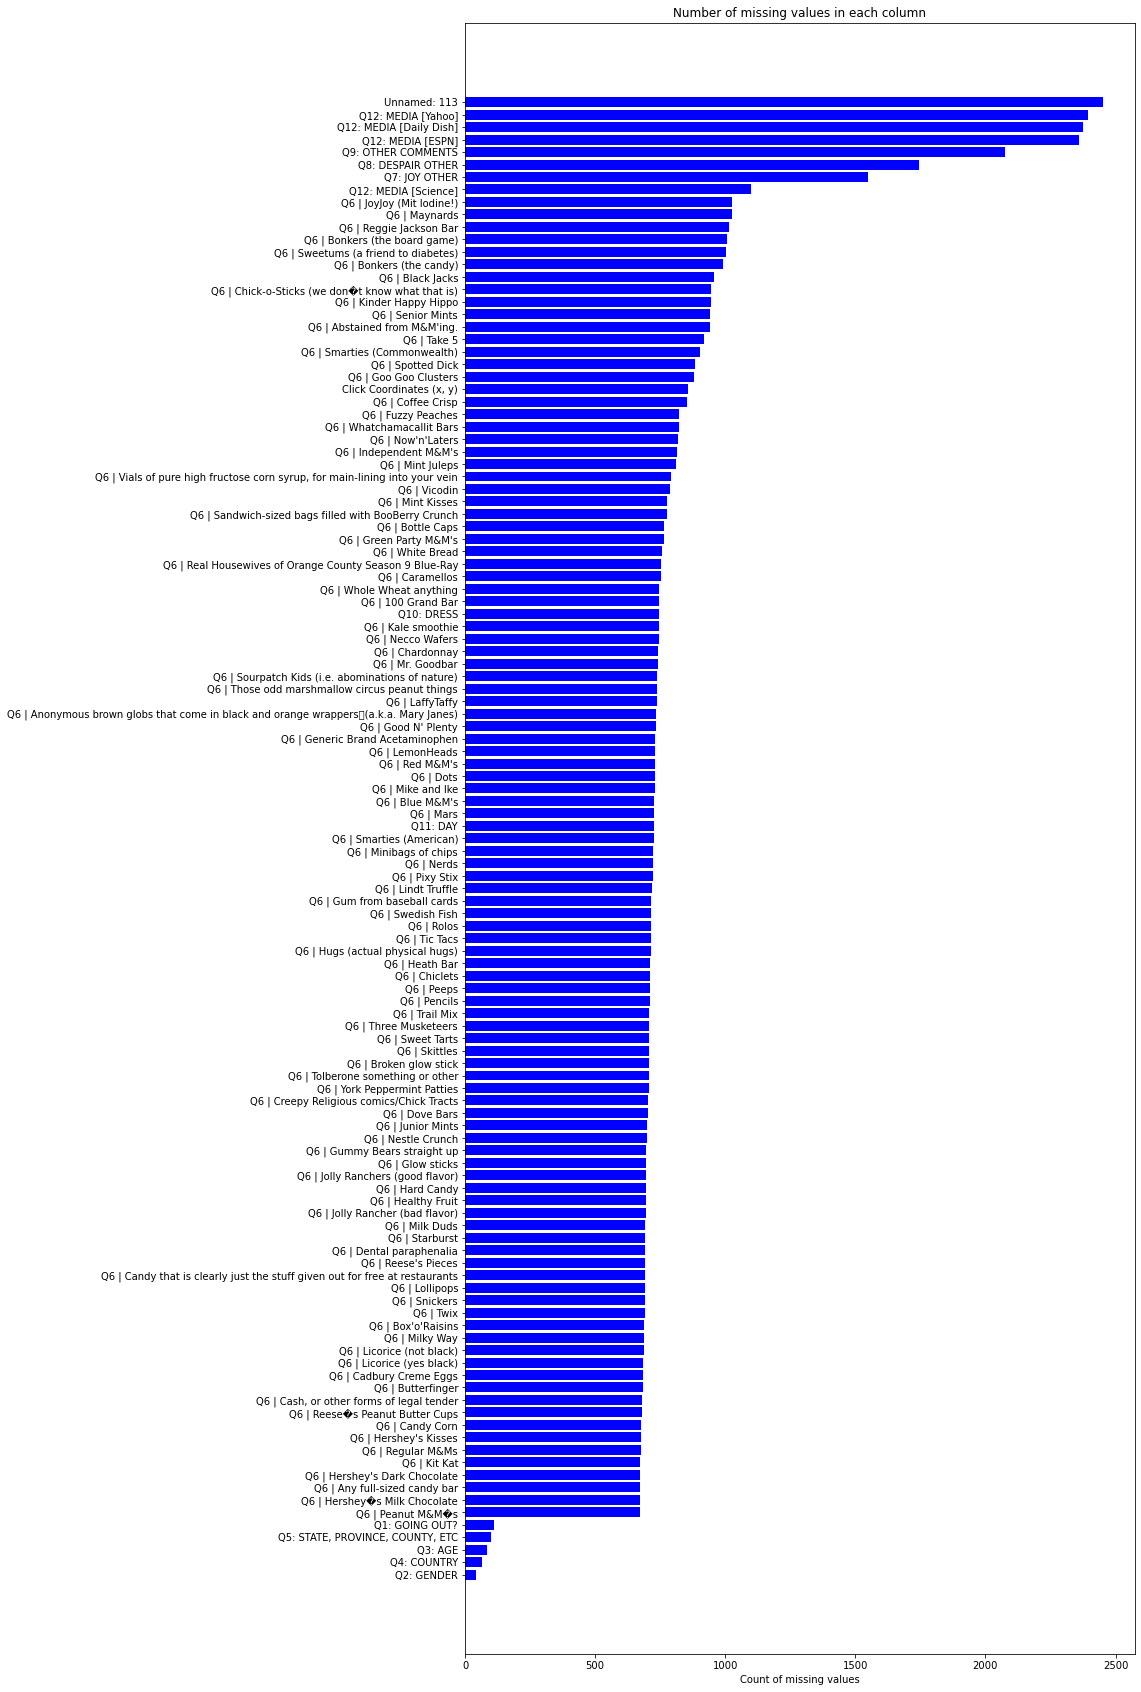

In [9]:
# visualize missing values. Total nulls in each column

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')


ind = np.arange(missing_df.shape[0])
width = 2.0
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

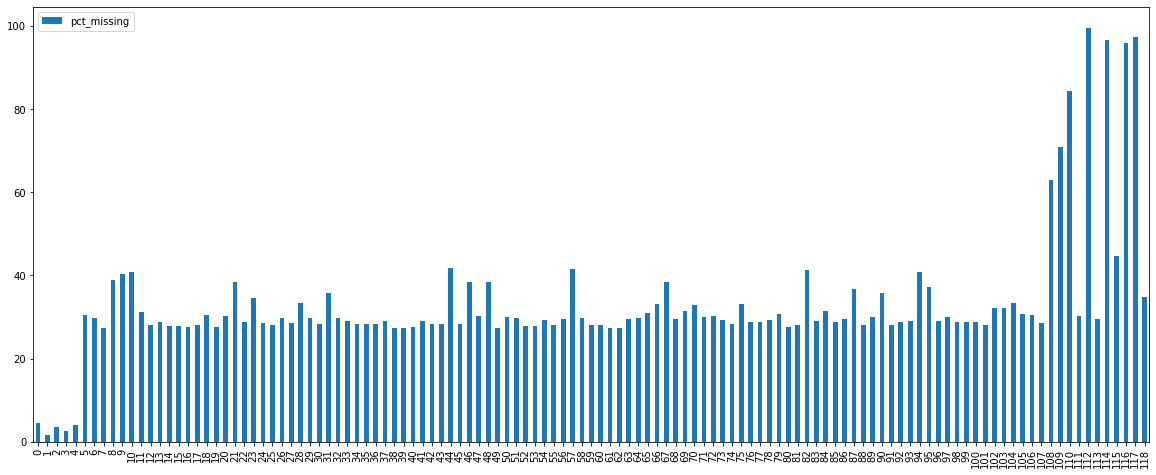

In [10]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(20,8))
ax.set(xlabel= 'cols_list')
plt.show()

In [11]:
# dropping columns with more than 40% null values
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 50, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 90258773 to 90314802
Columns: 114 entries, Q1: GOING OUT? to Yes
dtypes: float64(1), object(111), uint8(2)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


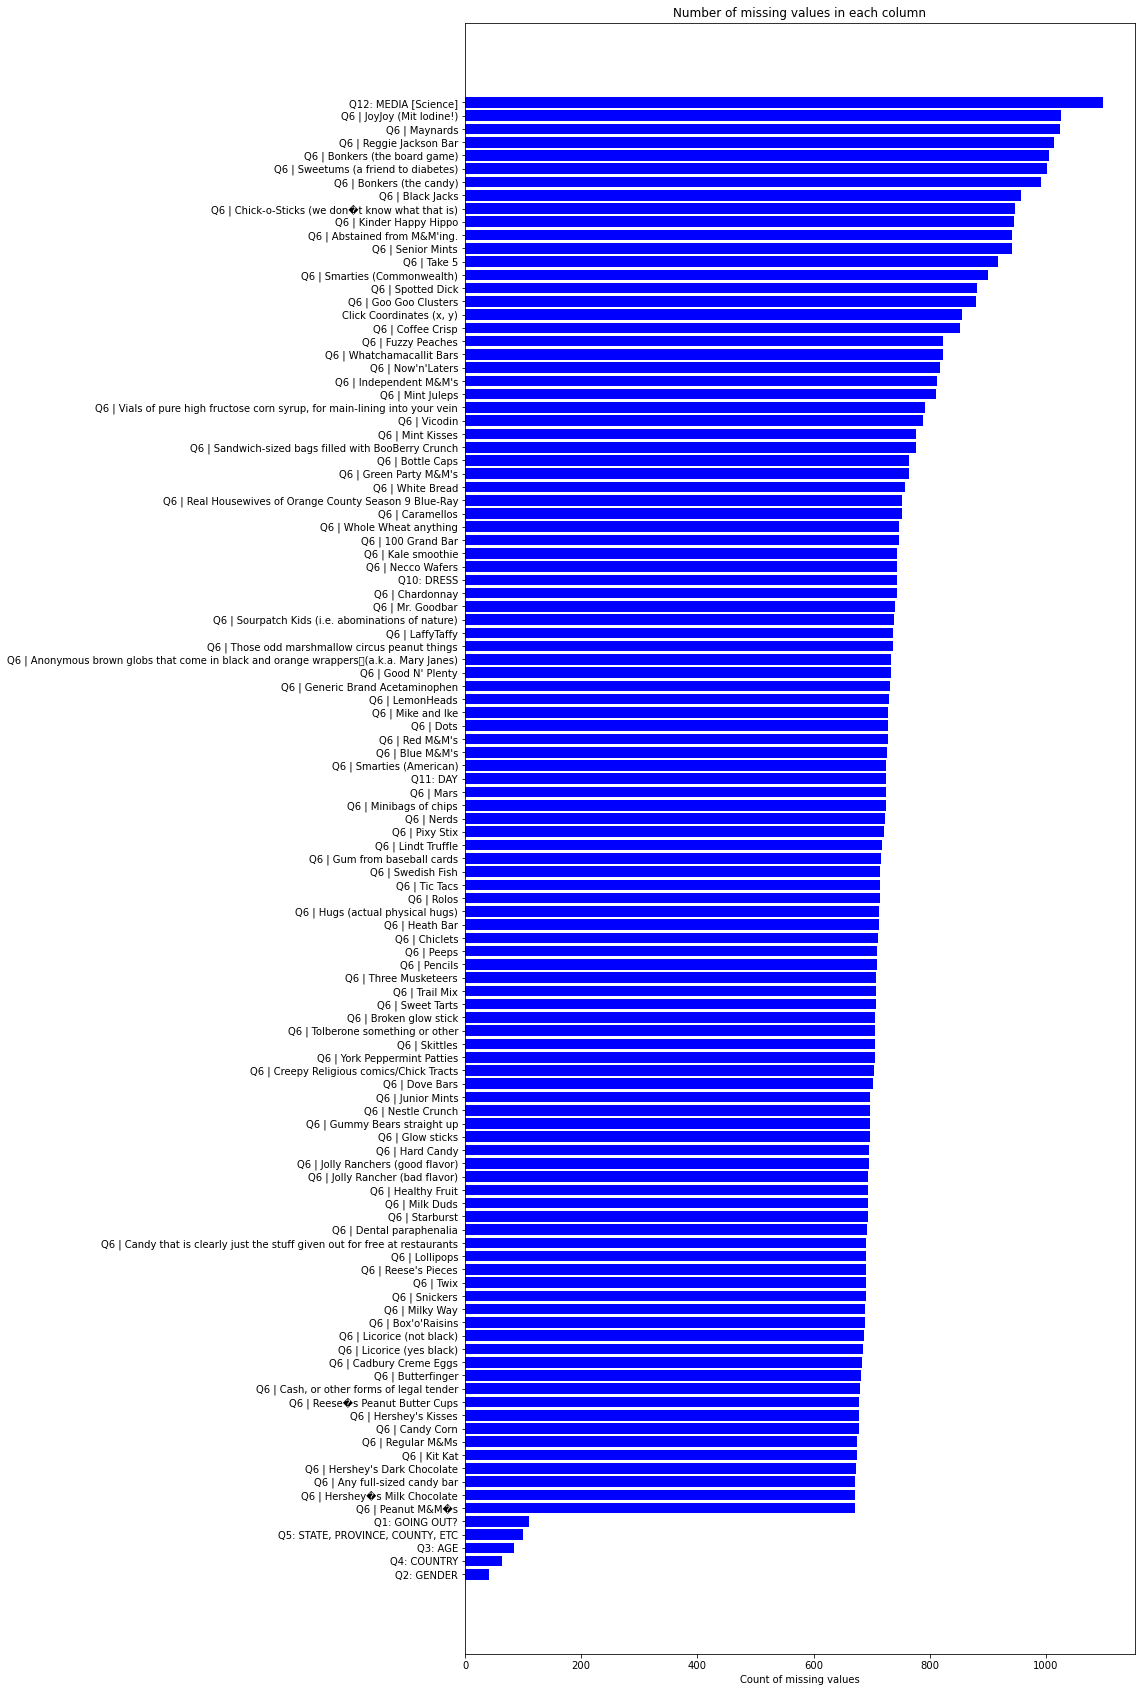

In [13]:
# visualize missing values. Total nulls in each column

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')


ind = np.arange(missing_df.shape[0])
width = 2.0
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()